In [1]:
#standard imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
#plotting
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [5]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

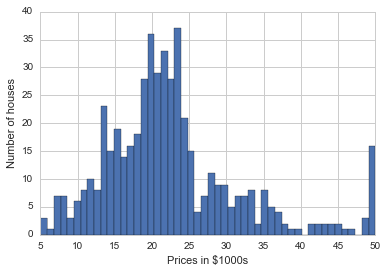

In [7]:
plt.hist(boston.target,bins=50)

plt.xlabel('Prices in $1000s')
plt.ylabel('Number of houses')

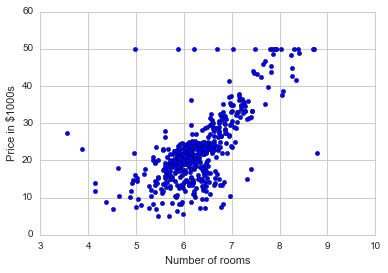

In [8]:
plt.scatter(boston.data[:,5], boston.target)

plt.ylabel('Price in $1000s')
plt.xlabel('Number of rooms')

In [10]:
boston_df = DataFrame(boston.data)

boston_df.columns = boston.feature_names

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [13]:
boston_df['Price'] = boston.target

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


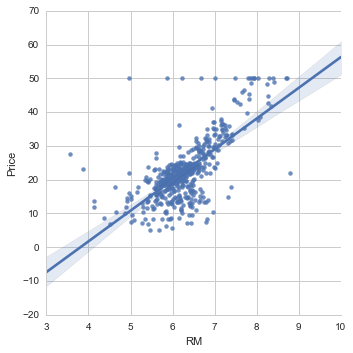

In [14]:
sns.lmplot('RM', 'Price',data=boston_df)

In [15]:
X = boston_df.RM

In [17]:
X = np.vstack(boston_df.RM)

In [18]:
X.shape

(506, 1)

In [19]:
Y = boston_df.Price

In [21]:
#[X 1]
X = np.array([ [value, 1] for value in X] )
X

array([[array([ 6.575]), 1],
       [array([ 6.421]), 1],
       [array([ 7.185]), 1],
       ..., 
       [array([ 6.976]), 1],
       [array([ 6.794]), 1],
       [array([ 6.03]), 1]], dtype=object)

In [23]:
m, b = np.linalg.lstsq(X,Y)[0]

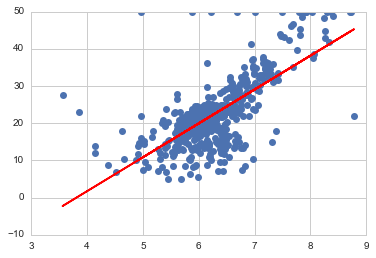

In [24]:
plt.plot(boston_df.RM, boston_df.Price, 'o')

x = boston_df.RM

plt.plot(x,m*x+b, 'r', label = 'Best Fit Line')

In [25]:
result = np.linalg.lstsq(X,Y)

error_total = result[1]

rmse = np.sqrt(error_total/len(X))

print('The room mean square error was %.2f'%rmse)

The room mean square error was 6.60


In [26]:
import sklearn
from sklearn.linear_model import LinearRegression

In [27]:
lreg = LinearRegression()

In [28]:
X_multi = boston_df.drop('Price',1)

Y_target = boston_df.Price

In [29]:
lreg.fit(X_multi, Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
print('The estimated intercept coefficient is %.2f'%lreg.intercept_)
print('The number of coefficients used was %d'%len(lreg.coef_))

The estimated intercept coefficient is 36.49
The number of coefficients used was 13


In [33]:
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

coeff_df['Coefficient Estimate'] = pd.Series(lreg.coef_)

coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [34]:
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, boston_df.Price)

In [35]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(379, 2) (127, 2) (379,) (127,)


In [36]:
lreg = LinearRegression()

lreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [40]:
print("Fit a model X_train, and calculate the MSE with Y_train: %.2f" %np.mean((Y_train-pred_train)**2))
print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f" %np.mean((Y_test - pred_test)**2))

Fit a model X_train, and calculate the MSE with Y_train: 44.84
Fit a model X_train, and calculate MSE with X_test and Y_test: 40.23


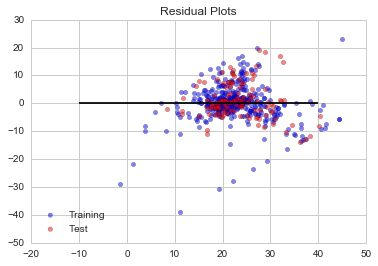

In [45]:
train = plt.scatter(pred_train, (pred_train-Y_train),c='b', alpha=0.5)

test = plt.scatter(pred_test, (pred_test-Y_test), c='r', alpha = 0.5)

plt.hlines(y=0, xmin=-10, xmax=40)

plt.legend((train,test), ('Training','Test'), loc='lower left')

plt.title('Residual Plots')